In [27]:
from classy import Class

import numpy as np
LambdaCDM = Class()
ln_10_10_As = 3.044
A_s = np.exp(ln_10_10_As)  * 1e-10
# A_s = 3.044e-10
ln_10_10_As_2020 = 3.040
A_s_2020 = np.exp(ln_10_10_As)  * 1e-10

# 1807.06209 table 2, TT,TE,EE+lowE+lensing 
# LambdaCDM.set({'omega_b':0.02237,
#                'omega_cdm':0.1200,
#             #    '100theta_s':1.04110,
#                'H0':67.36,
#                'A_s':A_s,
#                'n_s':0.9649,
#                'tau_reio':0.0544,
#                'N_mscf':0,
#                "do_shooting": "no",
#                }
#                )

# https://hal.science/hal-04231374/file/aa48015-23.pdf
LambdaCDM.set({'omega_b':0.02226,
               'omega_cdm':0.1188,
            #    '100theta_s':1.04110,
               'H0':67.64,
               'ln10^{10}A_s':3.040,
               'n_s':0.9681,
               'tau_reio':0.0580,
               'N_mscf':0,
               "do_shooting": "no",
               }
               )
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes'})

LambdaCDM.compute()
bg = LambdaCDM.get_background()


cl_tot_0 = LambdaCDM.raw_cl(2500)

ell = cl_tot_0['ell']
cl_tt_0 = cl_tot_0['tt']
D_ell_0 = ell*(ell+1)/(2*np.pi) * cl_tt_0
z_lcdm = bg['z'] #redshift
H_lcdm = bg['H [1/Mpc]'] #hubble rate

NPTS = 500  # choose 100, 200, 300… depending on how small you want the file

idx = np.round(np.linspace(0, len(z_lcdm) - 1, NPTS)).astype(int)

z_small_lcdm       = z_lcdm[idx]
H_small_lcdm  = H_lcdm[idx]
print(ell)

[   0    1    2 ... 2498 2499 2500]


In [28]:
EDE = Class()
ln_10_10_As =  3.055525e+00
A_s = np.exp(ln_10_10_As)  * 1e-10

EDE.set({
    "omega_b": "2.235915e-02",
    "omega_cdm": "1.242044e-01",
    "H0": "6.988740e+01",
    'ln10^{10}A_s':3.056946e+00,    
    "n_s": "9.771736e-01",
    "tau_reio": "5.843751e-02",
    "N_mscf": "1",
    "fraction_maxion_ac": "6.098957e-02",
    "log10_maxion_ac": "-3.567276e+00",
})

EDE.set({
   "k_pivot": 0.05,
   "N_ur": 2.0328,
   "N_ncdm": 1,
   "m_ncdm": 0.06,
   "T_ncdm": 0.71611,
   "N_mscf": 1,
   "theta_prime_ini_mscf": 0.0,
   "n_axion_mscf": 3.0,
   "theta_ini_mscf": 2.8,
   "tol_shooting_deltax": 0.01,
   "tol_shooting_deltaF": 0.01,
   "background_Nloga": 100000,
   "do_shooting": True,
   "do_shooting_mscf": True,
   "lensing":'y',
   "output": "tCl,pCl,lCl",
   "P_k_max_h/Mpc": 1.0,
   "input_verbose":5,
   "background_verbose": 5,
   "output_verbose": 5,
})



True

In [29]:

EDE.compute()
cl_tot_1 = EDE.raw_cl(2500)
ell = cl_tot_1['ell']
cl_tt_1 = cl_tot_1['tt']
D_ell_1 = ell*(ell+1)/(2*np.pi) * cl_tt_1

Reading input parameters
Reading input parameters
Computing unknown input parameters 2 
 -> matched budget equations by adjusting Omega_Lambda = 0.698533
 -> matched budget equations by adjusting Omega_Lambda = 0.698533
Stage 1: background
 -> matched budget equations by adjusting Omega_Lambda = 0.698533
Stage 1: background
 -> matched budget equations by adjusting Omega_Lambda = 0.698533
Stage 1: background
 -> matched budget equations by adjusting Omega_Lambda = 0.698533
Stage 1: background
 -> found alpha_squared_mscf = -1.84309470254810237044e+00
 -> found power_of_mu_mscf = -3.68690289594796238859e+00
Shooting completed using 4 function evaluations
 -> matched budget equations by adjusting Omega_Lambda = 0.698533
Running CLASS version v3.3.0
Computing background
 fraction of ncdm is 5.186623e-03 
 -> non-cold dark matter species with i=1 has m_i = 6.000000e-02 eV (so m_i / omega_i =9.313858e+01 eV)
 -> non-cold dark matter species with i=1 has m_i = 6.000000e-02 eV (so m_i / omega

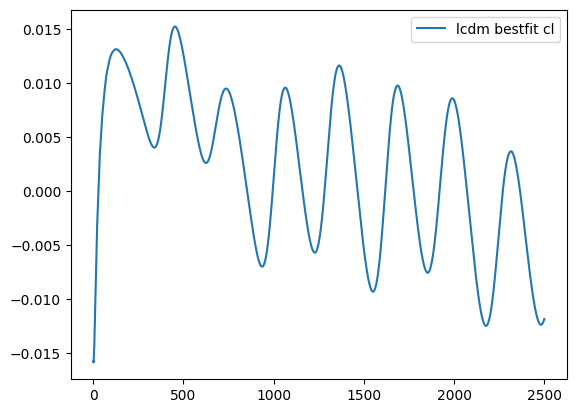

In [33]:
import matplotlib.pyplot as plt

# plt.plot(ell[500:], cl_tt_1[500:], label='1 axion bestfilt Cl')
# plt.plot(ell[500:], cl_tt_0[500:], label='lcdm bestfit cl')
plt.plot(ell[2:], (cl_tt_1[2:]-cl_tt_0[2:])/cl_tt_0[2:], label='lcdm bestfit cl')
plt.legend()